<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee have any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
# Suppress warnings to keep output clean
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating datasets
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE # Increases the number of samples in the minority class to balance class distribution.
from imblearn.under_sampling import RandomUnderSampler # Reduces the number of samples in the majority class to balance class distribution.
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None) # Ensures that all columns are displayed when printing a DataFrame
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
# Machine Learning Models (Ensemble & Tree-Based)
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores (Accuracy, Recall, F1, etc.)
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

## Import Dataset

In [3]:
# Loading dataset from my Google Drive same way I did on my previous Projects
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the dataset

In [4]:
# Inputting the file path from my Google Drive to where the foodhub_order.csv data set is located

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Mod3-Wk3_EasyVisa.csv')

In [5]:
# Making a copy of the dataframe to avoid making any changes to the original dataset.
data = df.copy()


## Understanding the structure of the data

#### View the first and last 5 rows of the dataset

In [6]:
# let's view the first 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


* **Observations:**

From a quick view of the 1st 5 rows of data I can see that case ID **EZYV04** has a **year of establishment** as 1897 which may be a mistake in the data.

In [7]:
# let's view the last 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


* **Observations:**

Similar to the 1st 5 rows of data I can see that for **year of establishment** there are some rather old values that I may want to review in more detail.

#### Understand the shape of the dataset

In [8]:
# Checking the number of rows and columns in the data
data.shape

(25480, 12)

* **Observations:**

In the current data set for EasyVisa there are **25480 rows** and **12 columns** as indicated from the data.shape command above.

#### Check the data types of the columns for the dataset

In [9]:
# data.info will give me the range of data types across the columns
# including column names, non-null counts and data types of the columns.

# data.dtypes will list each column's data type.
# data.info() gives more details, including non-null counts and memory usage

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* **Observations:**

1. There are 12 columns and 25480 total rows ranging from index 0 to 25479.
2. There is no missing data as indicated by the full 25480 non-null values
3. There are two integer columns, one float64 column and all others are text or object type.
4. The associated memory usage of this data frame is 2.3+ MB. This may come down a bit once we begin data preparation for modeling.

#### Checking for null values

In [10]:
# let's check for null values in the data
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


* **Observations:**

Based on the above, there are no null records in the data.

#### Checking for duplicate values

In [11]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

* **Observations:**

Based on the above, there are no duplicated records in the data.

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [12]:
# The describe() method will provide me a summary of all numerical columns.

data.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


* **Observations:**

* Based on the above, I can see there is a negative value for **# of employees** above. This may just be a data error that needs to be corrected.

* I also see that for **year of establishment**, 1800 is the minimum. This may be an outlier or error that needs to be addressed.

* Under **# of employees**, I see a maximum value of 602K. This is probably another outlier that may need to be dealth with as well.

#### Let's check the count of each unique category in each of the categorical variables

In [13]:
# Making a list of all categorical variables and assign to cat_col
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV12       1
EZYV13       1
EZYV14       1
EZYV15       1
EZYV16       1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

* **Observations:**

* Based on the above, I can see there is a single unique record for each **case_id** column. I can probably drop this column later.

* For my target column of **Certified/Denied**, there are about twice as many for Certified.

* The greatest number of applicants are from **Asian** continent.

* The vast majority of applicants **do not** require job training.

* The unit of wage has multiple values from **year/hour/week**, etc. that may need ot bne addressed below prior to model building.

In [14]:
# checking the number of unique values for case_id which should be 25480.
data["case_id"].nunique()

25480

* **Observations:**

* As expected, there are 25480 unique values for case_id. I'll drop this column below as it does not serve our purpose for modelling.

In [15]:
data.drop(["case_id"], axis=1, inplace=True)

In [16]:
# Let's verify case_id has in fact been dropped from our dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


* **Observations:**

* As expected, the **case_id** column has been dropped from our dataset.

### Univariate Analysis

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [17]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)}, # 25% / 75% split for histogram / boxplot
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram with green line
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram with black green

In [18]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

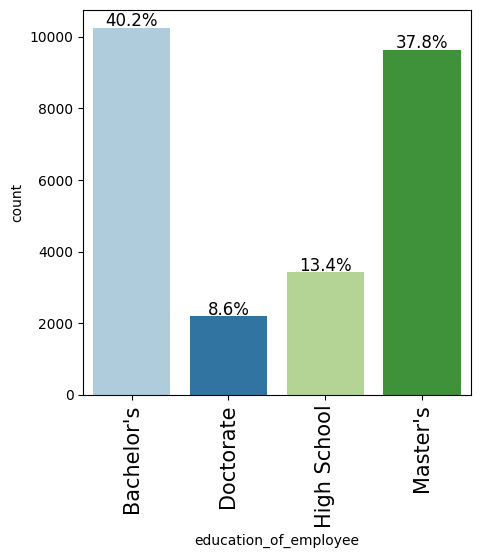

In [19]:
# Calling the above function to create a barplot for 'education_of_employee'
labeled_barplot(data, "education_of_employee", perc=True)

* **Observations:**

* Based on the above barplot, 86.6% of applicants have some sort of higher education, with almost half holding a Bachelor's Degree.

* I don't see any other significance here.

#### Observations on region of employment

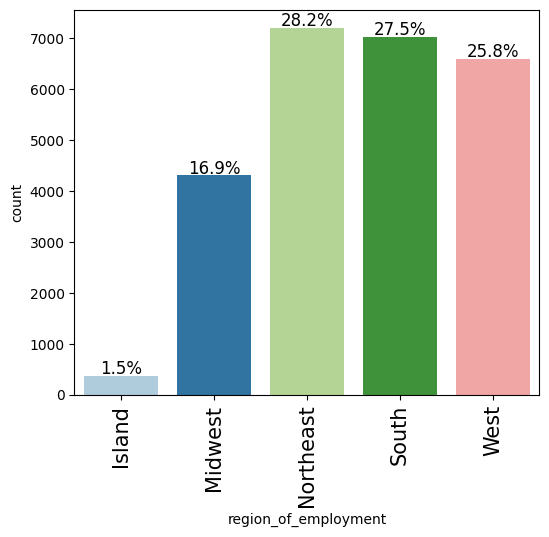

In [20]:
# Calling the above function to create a barplot for 'region_of_employment'
labeled_barplot(data, "region_of_employment", perc=True)

* **Observations:**

* Based on the above barplot, there is close to a 1/3 split of applicants between the Northeastern, South, and West Regions.

* Only 1.5% are from an island region and the final 16.9% are from the Midwest.

* I don't see any other significance here.

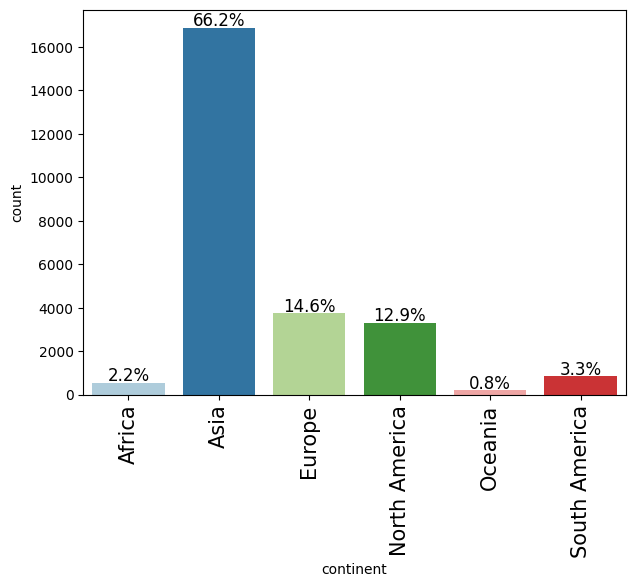

In [21]:
# Calling the above function to create a barplot for 'continent'
labeled_barplot(data, "continent", perc=True)

* **Observations:**

* Based on the above barplot, about 2/3rds (66.2%) of applicants are from the Asian continent.

* I don't see any other significance here.

#### Observations on job experience

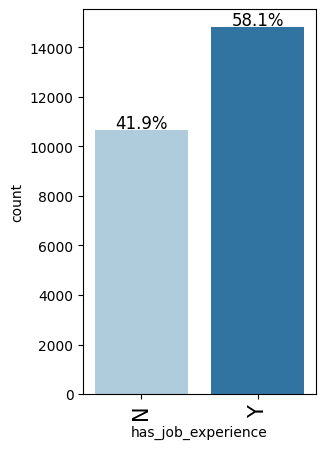

In [22]:
# Calling the above function to create a barplot for 'has_job_experience'
labeled_barplot(data, "has_job_experience", perc=True)

* **Observations:**

* Based on the above barplot, The majority (58.1%) seem to have job experience.

* I don't see any other significance here.

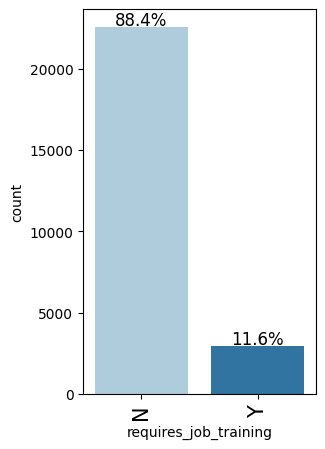

In [23]:
# Calling the above function to create a barplot for 'requires_job_training'
labeled_barplot(data, "requires_job_training", perc=True)

* **Observations:**

* Based on the above barplot, The vast majority (88.4%) do not require job training. Interestingly, almost 90% indicate no need for job training yet from the previous chart, nearly half 41.9% indicated having no job experience.

* I don't see any other significance here.

#### Observations on case status

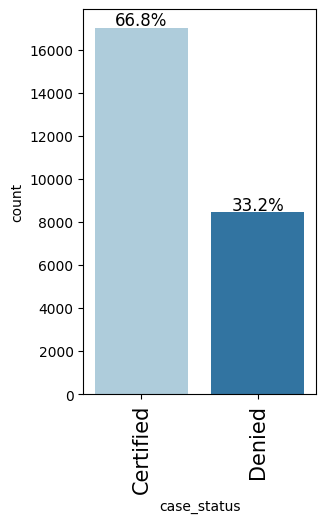

In [24]:
# Calling the above function to create a barplot for 'case_status'
labeled_barplot(data, "case_status", perc=True)

* **Observations:**

* Based on the above barplot, about 2/3rds (66.8%) get certified for a visa.

* This may correlate roughly to the job experience numbers which can look at during bivariate analysis.

#### Observations on prevailing wage

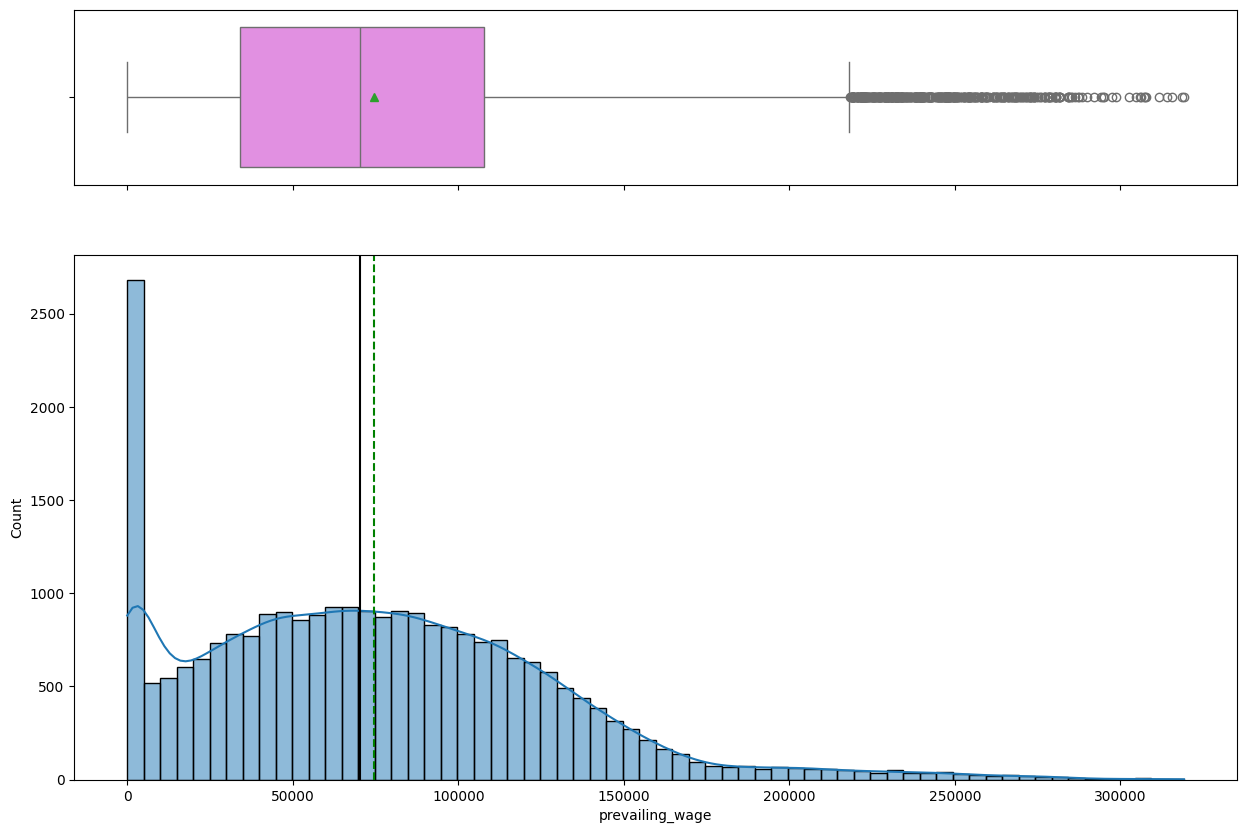

In [25]:
# Calling the above function to create a histogram/boxplot for 'prevailing_wage'
histogram_boxplot(data, "prevailing_wage", kde=True)

* **Observations:**

* Based on the above histogram and boxplot, it is right skewed because the mean (average - green line) is to the right of the median (black line) and has a right sided tail.

* The majority seems to fall between around 40K and 100K with several outliers in the higher wage ranges.

* The boxplot confirms these outliers above the upper whisker. These high wages are significantly above the interquartile range (IQR)

* Interestingly, there is a significant number at zero, indicating not employed I presume.

* During data preparation I **may** consider capping the wage at the 99 percentile to reduce the number of outliers. 99th percentile cap for prevailing_wage: **238215.45**.

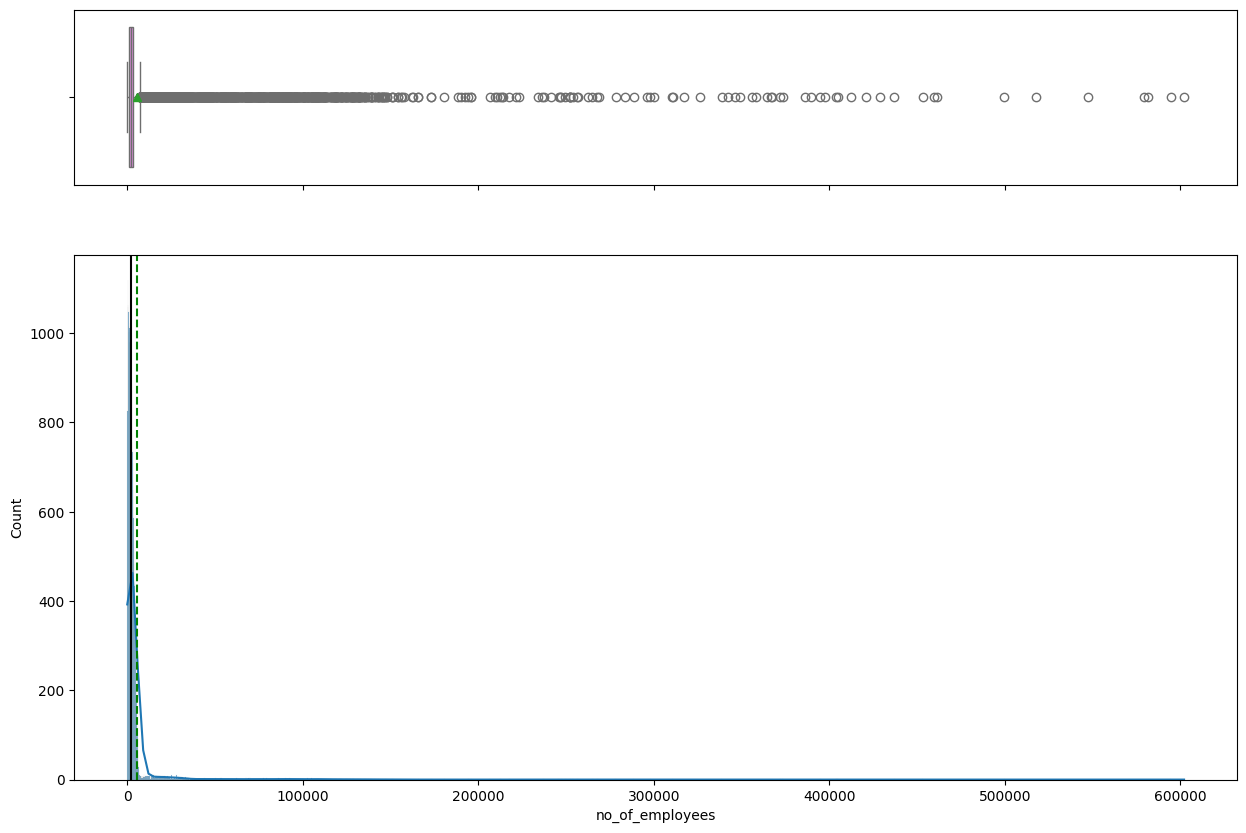

In [26]:
# Calling the above function to create a histogram/boxplot for 'no_of_employees'
histogram_boxplot(data, "no_of_employees", kde=True)

* Based on the above histogram and boxplot, it is significantly right skewed with severe outliers that may need to be dealt with in data pre-processing.

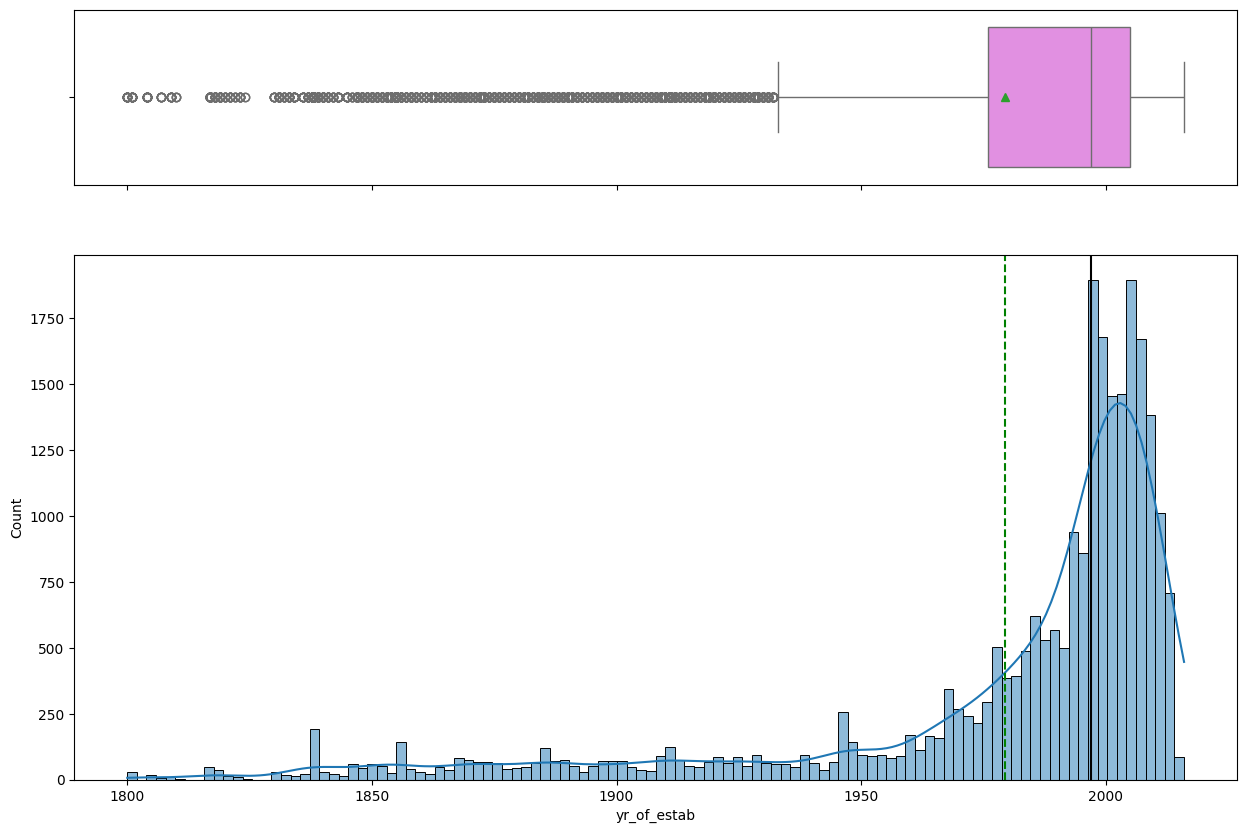

In [27]:
# Calling the above function to create a histogram/boxplot for 'yr_of_estab'
histogram_boxplot(data, "yr_of_estab", kde=True)

* Based on the above histogram and boxplot, it is left skewed with severe outliers that may need to be dealt with in data pre-processing.

* During data processing I may cap year of establishment to **>1900** to remove the significant outliers.

### Bivariate Analysis

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [28]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [29]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation Matrix (For Numeric Features)

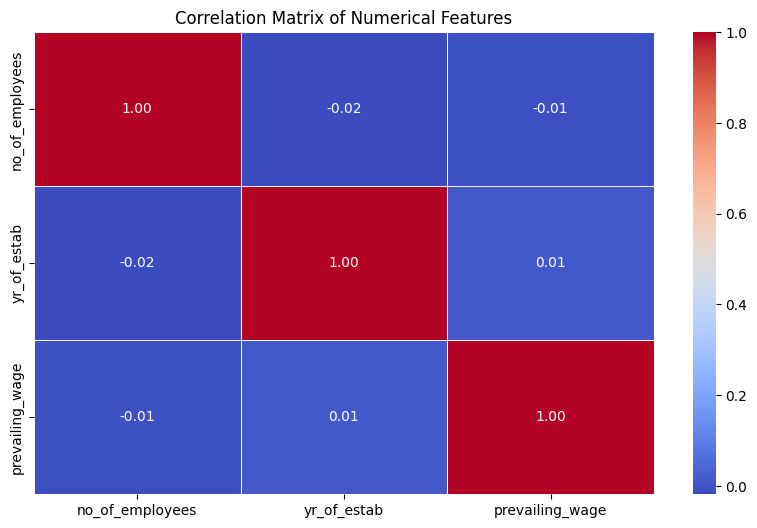

In [30]:
# Plot a Correlation Matrix to help identify relationships between numeric variables.

# Select only numerical features for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Compute and plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


* **Observations:**

* Based on the above correlation matrix, I do not see any significant correlation between the current numerical values in the dataset which is not surprising given the data.

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


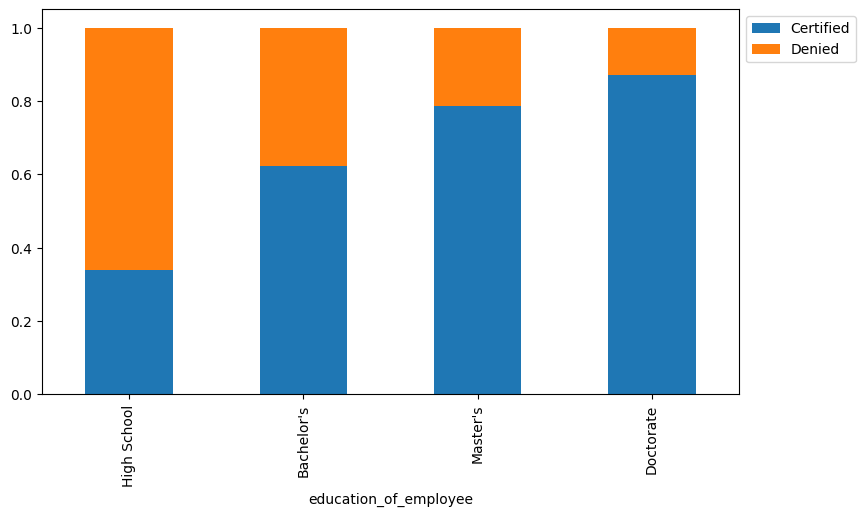

In [31]:
# Calling the above function 'stacked_barplot' for 'education_of_employee' and 'case_status'
stacked_barplot(data, "education_of_employee", "case_status")

* **Observations:**

* Based on the above stacked barplot, there seems to be a clear correlation between level of education to case status where those with higher education tend to be approved for a visa over those applicants with only a high school level education.

* The highest number of applicants with approved visas are those with Masters Degrees.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


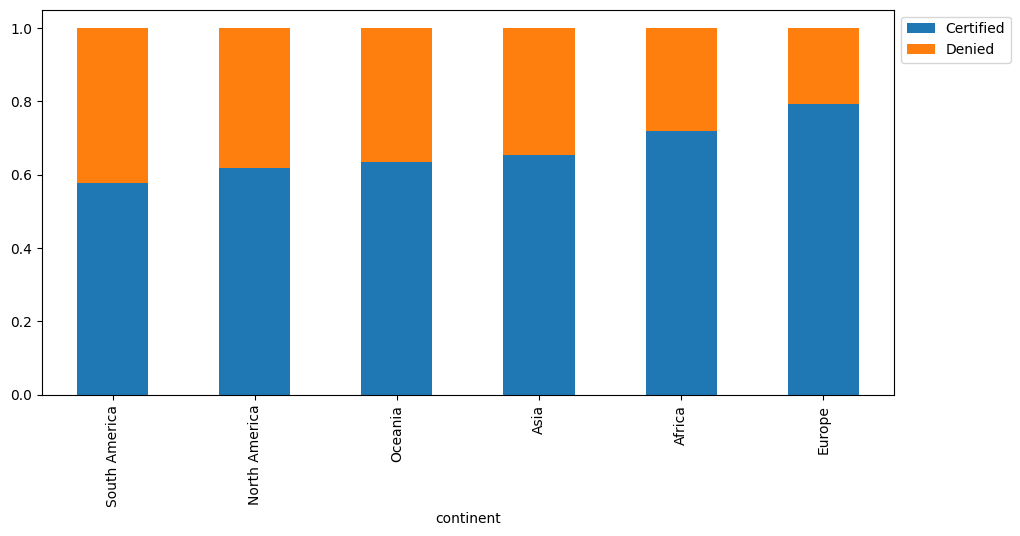

In [32]:
# Calling the above function 'stacked_barplot' for 'continent' and 'case_status'
stacked_barplot(data, "continent", "case_status")

* **Observations:**

* Based on the above stacked barplot, the bars are fairly evenly distributed, indicating **continent** may not be a strong factor.

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


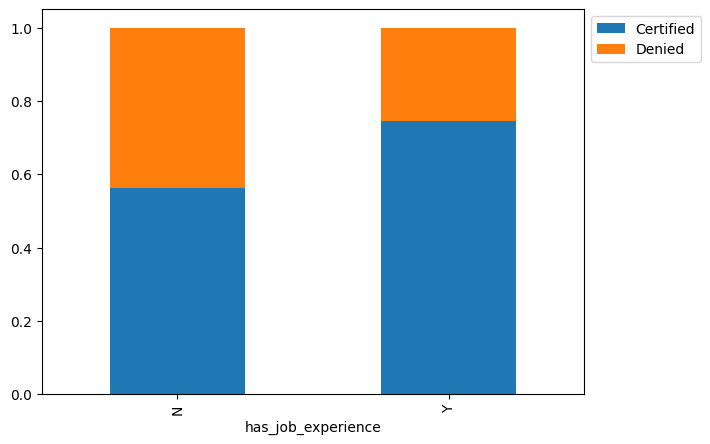

In [33]:
# Calling the above function 'stacked_barplot' for 'has_job_experience' and 'case_status'
stacked_barplot(data, "has_job_experience", "case_status")

* **Observations:**

* Based on the above stacked barplot, they do show a higher number of approved visa status for individuals with work experience which is not surprising.

#### Checking if the prevailing wage is similar across all the regions of the US

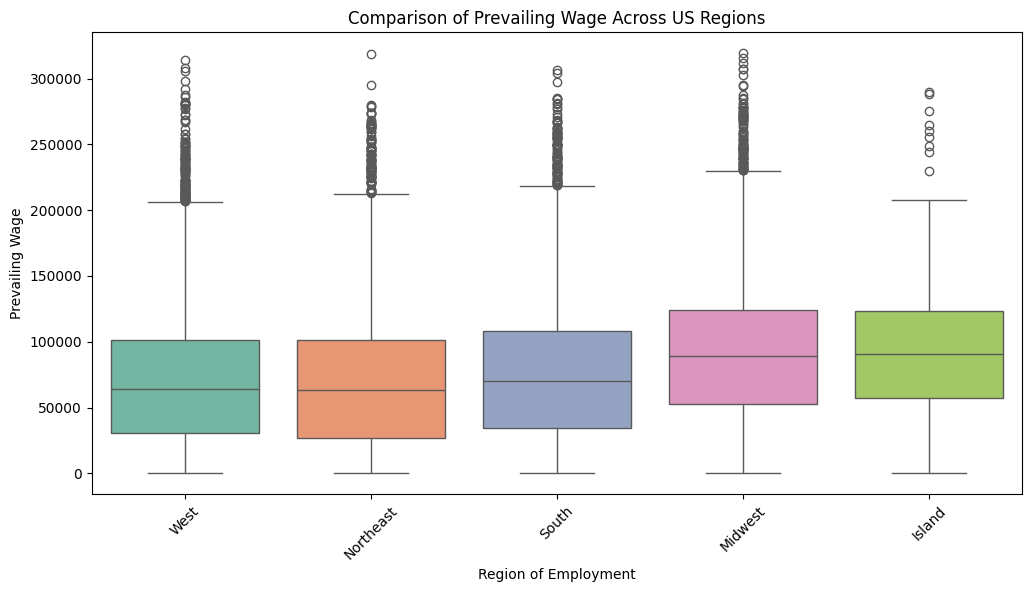

In [34]:
# Creating a boxplot for 'prevailing_wage' and 'region'

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="region_of_employment", y="prevailing_wage", palette="Set2")

# Formatting the plot
plt.title("Comparison of Prevailing Wage Across US Regions")
plt.xlabel("Region of Employment")
plt.ylabel("Prevailing Wage")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* **Observations:**

* Based on the above boxplot, the different regions across the U.S. have a fairly evenly distributed prevailing wage. A couple regions are slightly higher but not significantly from what I can see from the chart.

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

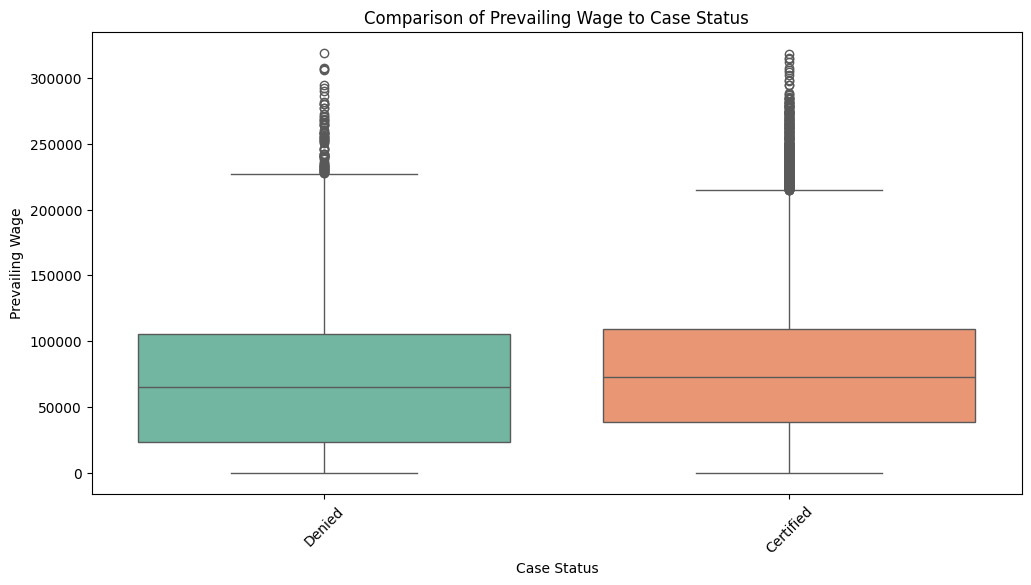

In [35]:
# Creating a boxplot for 'prevailing_wage' and 'case_status'

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="case_status", y="prevailing_wage", palette="Set2")

# Formatting the plot
plt.title("Comparison of Prevailing Wage to Case Status")
plt.xlabel("Case Status")
plt.ylabel("Prevailing Wage")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

* **Observations:**

* Based on the above boxplot, visa case status has a fairly evenly distributed prevailing wage. There are significant high income outliers in both categories.

* I don't see anything else significant here.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


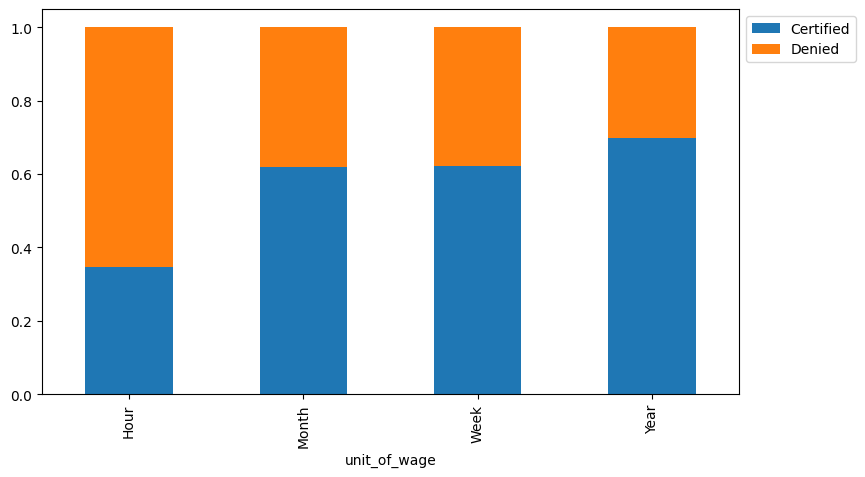

In [36]:
# Calling the above function 'unit_of_wage' for 'case_status' and 'case_status'
stacked_barplot(data, "unit_of_wage", "case_status")

* **Observations:**

* Based on the above stacked barplot, there does seem to be a correlation between 'unit of wage' and the number of certified visas. There is a higher number of certifications for wages reported by year. This may indicate from the chart that jobs paid by the hour actually have less visa certifications.

* Units of wages for month and week appear to be evenly distributed. The disparity is between hourly wage and yearly wage.

## Data Pre-processing

#### Fixing the negative values in number of employees columns

In [37]:
# check for instances where "no_of_employees" < 0
# Return an array or dataframe.

data[data["no_of_employees"] < 0]["no_of_employees"].unique()

array([-25, -11, -17, -26, -14])

* **Observations:**

Based on the above there are (5) negative (less than 0) values for number of employees. Based on this I will probably convert to absolute values.

In [38]:
# Let's get a total count of rows that have instances where "no_of_employees" < 0
# Count the number of rows where no_of_employees is -25, -11, -17, -26, or -14
# Filter the DataFrame to only include those rows where Experience is -1, -2, or -3

anomalous_employee_count = data[data["no_of_employees"].isin([-25, -11, -17, -26, -14])].shape[0]

# Display the count
print(anomalous_employee_count)

33


* **Observations:**

Based on the above there are (33) instances that have (less than 0) values for **number of employees**.

* I may want to convert these to their absolute .abs values or simply replace them with the mean or median. Alternatively, I can delete these rows, however I do not feel that would be the correct course of action at this time.

In [39]:
# Let's change all instances where "no_of_employees" < 0 to the numerical absolute value.
# This will ensure all negative values become positive in one step.

data["no_of_employees"] = data["no_of_employees"].abs()

# Let's verify those negative values are in fact changed to positive.
anomalous_employee_count = data[data["no_of_employees"].isin([-25, -11, -17, -26, -14])].shape[0]

# Display the count
print(anomalous_employee_count)

0


In [40]:
# check for instances where "no_of_employees" < 0
# Return an array or dataframe.

data[data["no_of_employees"] < 0]["no_of_employees"].unique()

array([], dtype=int64)

* **Observations:**

Based on above, I can see the count is now 0 (**empty array**) for instances where **no_of_employees** is either -25, -11, -17, -26, or -14.

### Outlier Check

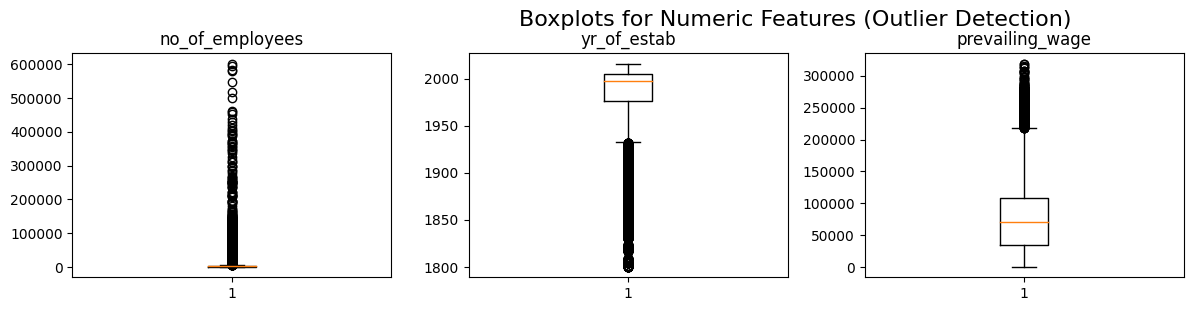

In [41]:
# outlier detection using boxplot

# Get all numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

# Set the number of plots per row (adjustable)
plots_per_row = 4

# Calculate rows needed based on number of numeric columns
num_plots = len(numeric_columns)
num_rows = int(np.ceil(num_plots / plots_per_row))

# Create the boxplots
plt.figure(figsize=(16, num_rows * 3))

for i, variable in enumerate(numeric_columns):
    plt.subplot(num_rows, plots_per_row, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)
    plt.tight_layout()

plt.suptitle("Boxplots for Numeric Features (Outlier Detection)", fontsize=16, y=1.02)
plt.show()


In [42]:
# Calculate Outliers Using IQR
def count_outliers_iqr(data, column):
    """
    Returns the number of outliers in a numeric column using the IQR method.

    Parameters:
    - data: pandas DataFrame
    - column: name of the numeric column to analyze

    Returns:
    - count of outliers
    """
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

# Listing the 3 numeric columns:
print ("Using IQR the 'prevailing wage outliers' = ", count_outliers_iqr(data, "prevailing_wage"))
print ("-" * 50)
print ("Using IQR the 'No. of Employees' outliers = ", count_outliers_iqr(data, "no_of_employees"))
print ("-" * 50)
print ("Using IQR the 'Year of Establishment' = ", count_outliers_iqr(data, "yr_of_estab"))


Using IQR the 'prevailing wage outliers' =  427
--------------------------------------------------
Using IQR the 'No. of Employees' outliers =  1556
--------------------------------------------------
Using IQR the 'Year of Establishment' =  3260


* For **Year of Establishment**, it is left skewed with severe outliers that may need to be dealt with in data pre-processing. During data processing I may cap year of establishment to > 1900 to remove the significant outliers.

* For **No. of Employees**, it is significantly right skewed with severe outliers that may need to be dealt with in data pre-processing. I may cap at the 99 percentile since No. of Employees goes up to 600K.

* For **Prevailing Wage**, it is significantly right skewed with severe outliers that may need to be dealt with in data pre-processing. I may cap at the 99 percentile at 238K

### Data Preparation and Feature Engineering for Modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.
- We'll also drop case_status

* For **Year of Establishment**, Capped to min = 1900 to remove the significant outliers.

* For **No. of Employees**, No action taken for these outliers.

* For **Prevailing Wage**, No action taken for these outliers.



In [43]:
# Checking my Certified and Denied counts PRIOR TO data engineering.
data["case_status"].value_counts()

,case_status
Certified,17018
Denied,8462


In [44]:
# 1. Cap Outliers
# Cap yr_of_estab to be no less than 1900
data["yr_of_estab"] = data["yr_of_estab"].clip(lower=1900)

# Cap no_of_employees at the 99th percentile
#employee_cap = data["no_of_employees"].quantile(0.99)
#data["no_of_employees"] = data["no_of_employees"].clip(upper=employee_cap)

# 2. Encode target to binary (true/false): case_status (Certified = true(1), else = false(0))
#data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)
data["case_status"] = (data["case_status"] == "Certified").astype(int)

# 3. Separate features and target
X = data.drop(columns=["case_status"])  # Drop the target from feature set
y = data["case_status"]

# 4. One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data into 60/20/20 training, validation and test set:
# first we split data into 2 parts, temporary and test
# Step 1: Split data into 80% temp (train+val) and 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Step 2: Split 80% temp into 75% train and 25% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)

# Resulting Proportions:
# Train = 60% (75% of 80%)
# Validation = 20% (25% of 80%)
# Test = 20%

In [45]:
# Checking total number of features as I made a data error earlier:
print("Number of features:", len(X_train.columns))
print("First 10 features:", X_train.columns[:10].tolist())

Number of features: 21
First 10 features: ['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'continent_Asia', 'continent_Europe', 'continent_North America', 'continent_Oceania', 'continent_South America', 'education_of_employee_Doctorate', 'education_of_employee_High School']


In [46]:
# Checking my Certified and Denied counts AFTER data engineering as I made a data error earlier.
data["case_status"].value_counts()

,case_status
1,17018
0,8462


In [47]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (15288, 21)
Shape of Validation set :  (5096, 21)
Shape of test set :  (5096, 21)
Percentage of classes in training set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64
Percentage of classes in validation set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667975
0    0.332025
Name: case_status, dtype: float64


* **Observations:**

- Based on my data and feature engineering, and data splits, everything looks ready tomove on to model building:
- My Data Shape and Splits look correct (60/20/20) Train / Validation / Text
- Target Class Distribution is consistent across Train/Val/Test by using stratification.




## Model Building

### Model Evaluation Criterion

**The Goal of the Model**
- Predict whether a visa application will be approved ("Certified") or denied ("Denied").

**Model can make wrong predictions as:**
1. Predicting an applicant will be denied, but they get approved - A qualified candidate not moving forward. Loss of opportunity for employee and employer.
2. Predicting an applicant will be approved, but they actually get denied - wasted time and resources on a weak applicant.

**Which case is more important?**
* Predicting an applicant will be denied, but they get approved (false negative) has the more negative implications.
* We might reject or overlook a strong candidate who would have qualified.
* Could undermine trust in the model's value as a decision support tool.
* The company loses out on talent due to a model’s conservative bias

**How to reduce this loss i.e need to reduce False Negatives?**
* We would want Recall to be maximized, greater the Recall lesser the chances of false negatives.
* We should optimize for higher recall (i.e., catch as many true "Certified" cases as possible)

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [49]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [50]:
scorer = metrics.make_scorer(metrics.recall_score)

## Possible metrics are [recall_score,f1_score,accuracy_score,precision_score]
## For example, metrics.precision_score

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

**I'l be building the following models for comparison.**
- Bagging ensemble with DecisionTree base
- Random forest	RandomForestClassifier
- GBM	GradientBoostingClassifier
- Adaboost	AdaBoostClassifier
- dtree	Single DecisionTreeClassifier

### Model building with original data

In [51]:
# Initialize list of models
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

results1 = []  # Empty list to store all models' CV scores
names = []     # Empty list to store model names

# Cross-validation performance
print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print(f"{name}: Mean Recall = {cv_result.mean():.4f}")

# Validation set performance
print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print(f"{name}: Validation Recall = {scores:.4f}")



Cross-Validation performance on training dataset:

Bagging: Mean Recall = 0.7775
Random Forest: Mean Recall = 0.8492
GBM: Mean Recall = 0.8727
Adaboost: Mean Recall = 0.8868
XGBoost: Mean Recall = 0.8546
Decision Tree: Mean Recall = 0.7427

Validation Performance:

Bagging: Validation Recall = 0.7720
Random Forest: Validation Recall = 0.8375
GBM: Validation Recall = 0.8743
Adaboost: Validation Recall = 0.8822
XGBoost: Validation Recall = 0.8549
Decision Tree: Validation Recall = 0.7468


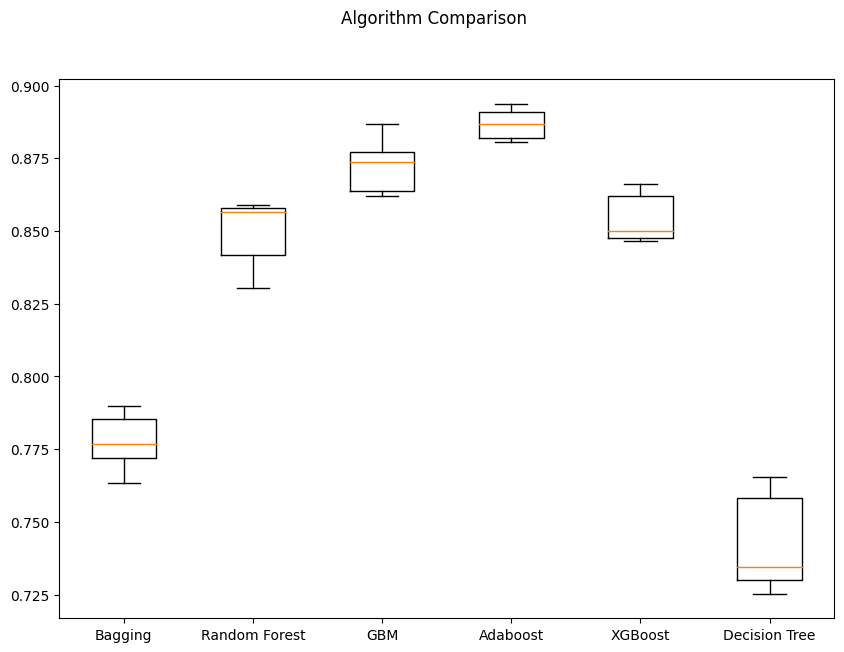

In [52]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- **Observations**
- **Adaboost** and **GBM** have the best performance followed by the XGBoost model as per the validation performance.



### Model Building with oversampled data

In [53]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [54]:
# Initialize list of models
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

results1 = []  # Empty list to store all models' CV scores
names = []     # Empty list to store model names

# Cross-validation performance
print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print(f"{name}: Mean Recall = {cv_result.mean():.4f}")

# Validation set performance
print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print(f"{name}: Validation Recall = {scores:.4f}")



Cross-Validation performance on training dataset:

Bagging: Mean Recall = 0.7775
Random Forest: Mean Recall = 0.8492
GBM: Mean Recall = 0.8727
Adaboost: Mean Recall = 0.8868
XGBoost: Mean Recall = 0.8546
Decision Tree: Mean Recall = 0.7427

Validation Performance:

Bagging: Validation Recall = 0.7453
Random Forest: Validation Recall = 0.7999
GBM: Validation Recall = 0.8020
Adaboost: Validation Recall = 0.7955
XGBoost: Validation Recall = 0.8149
Decision Tree: Validation Recall = 0.7221


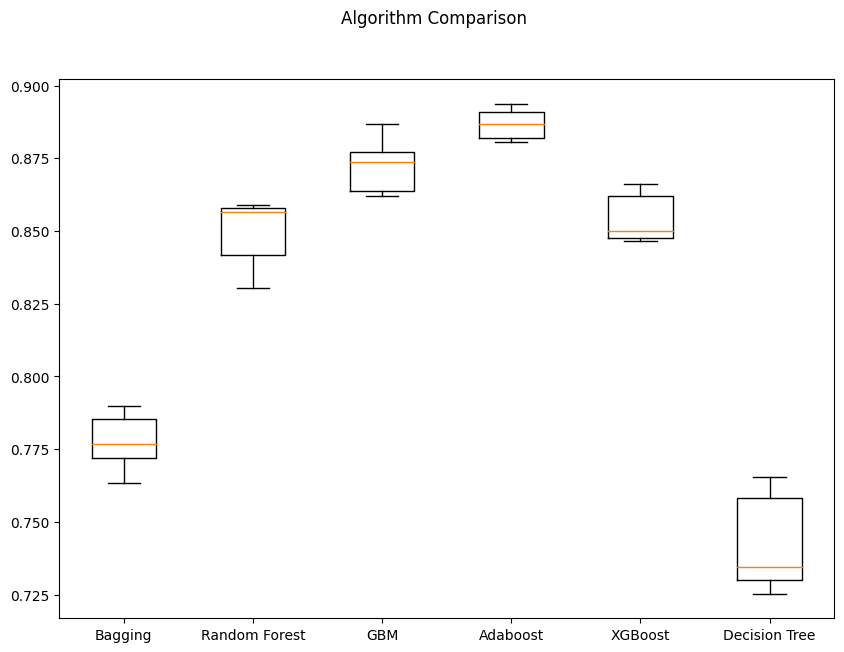

In [55]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- **Observations**
- **XGBoost** has the highest validation recall = 0.8149. It has the lowest performance gap of the top 3 models.
- **Adaboost** has the highest CV recall, but validation Recall drops by ~9 points. Possible overfitting on oversampled data.
- **GBM** is very strong, but also shows a bit more gap



### Model Building with undersampled data

In [56]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [57]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [58]:
# Initialize list of models
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

results1 = []  # Empty list to store all models' CV scores
names = []     # Empty list to store model names

# Cross-validation performance
print("\nCross-Validation performance on training dataset:\n")

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print(f"{name}: Mean Recall = {cv_result.mean():.4f}")

# Validation set performance
print("\nValidation Performance:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print(f"{name}: Validation Recall = {scores:.4f}")



Cross-Validation performance on training dataset:

Bagging: Mean Recall = 0.7775
Random Forest: Mean Recall = 0.8492
GBM: Mean Recall = 0.8727
Adaboost: Mean Recall = 0.8868
XGBoost: Mean Recall = 0.8546
Decision Tree: Mean Recall = 0.7427

Validation Performance:

Bagging: Validation Recall = 0.6069
Random Forest: Validation Recall = 0.6722
GBM: Validation Recall = 0.7318
Adaboost: Validation Recall = 0.7115
XGBoost: Validation Recall = 0.6892
Decision Tree: Validation Recall = 0.6345


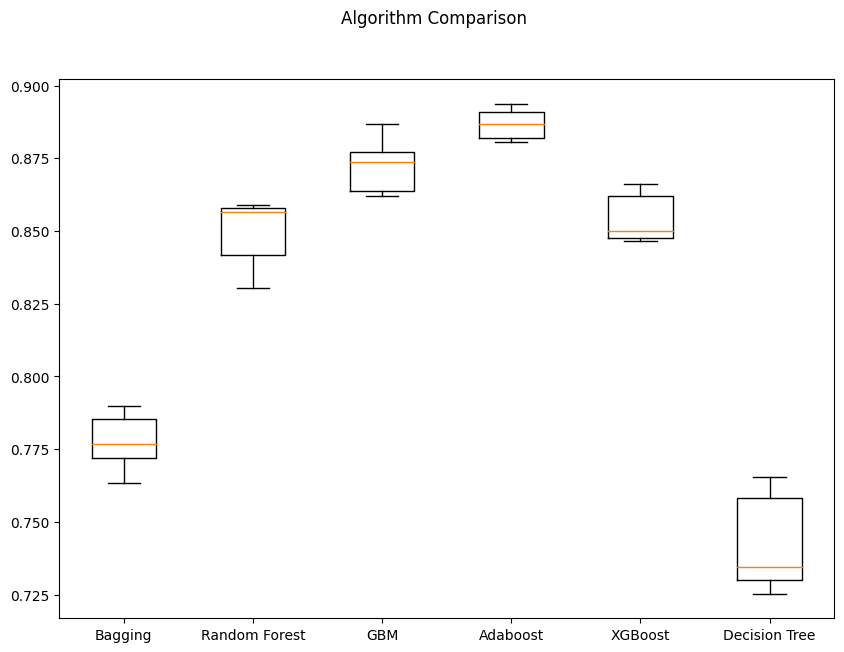

In [59]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

- **Observations**
- There is a significant drop between CV and validation scores. Undersampling has possibly removed too much data
- **Adaboost**, **GBM**, and **XGBoost** are still the top 3 models.
- **Decision Tree** has the smallest gap but its Recall is too low.



## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [60]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
# Fitting to over sampled data
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 10, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.809892262487757:
CPU times: user 1.35 s, sys: 281 ms, total: 1.63 s
Wall time: 22.5 s


In [61]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=1, n_estimators=10, random_state=1)

In [62]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_over, y_train_over)
adb_train

,Accuracy,Recall,Precision,F1
0,0.786092,0.804212,0.776087,0.789899


In [63]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.720761,0.792597,0.790044,0.791318


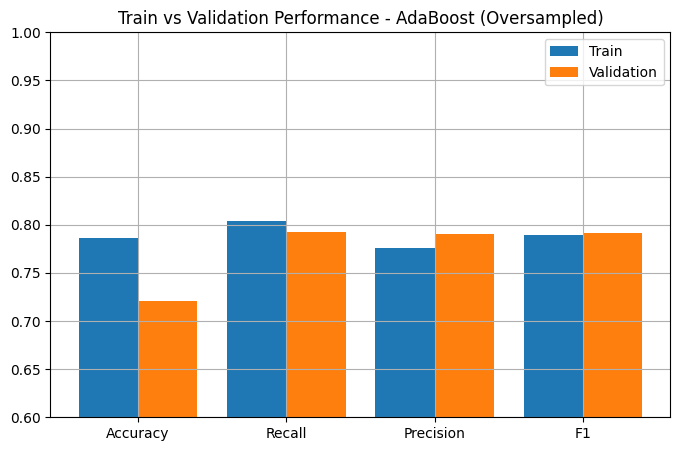

In [64]:
# Bar Chart of Train vs Validation Scores for Tuned AdaBoost using oversampled data
labels = ['Accuracy', 'Recall', 'Precision', 'F1']
train_scores = [0.7860, 0.8042, 0.7760, 0.7898]
val_scores = [0.7207, 0.7925, 0.7900, 0.7913]

x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar([i + 0.4 for i in x], val_scores, width=0.4, label='Validation', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0.6, 1.0)
plt.title("Train vs Validation Performance - AdaBoost (Oversampled)")
plt.legend()
plt.grid(True)
plt.show()


- **Observations**
- Recall is above 80% on the training and set.
- F1 is close showing good generalization between Train and Validaiton.

### Tuning Random forest using undersampled data

In [65]:
%%time

# Step 1: Define model
Model = RandomForestClassifier(random_state=1, class_weight='balanced')

# Step 2: Define parameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    "bootstrap": [True, False]
}

# Step 3: Define scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Step 4: Set up RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    random_state=1
)

# Step 5: Fit on undersampled data
randomized_cv.fit(X_train_un, y_train_un)

# Step 6: Output best parameters and recall
print("Best parameters for Random Forest (undersampled):")
print(randomized_cv.best_params_)
print("Best recall score (CV): {:.4f}".format(randomized_cv.best_score_))

Best parameters for Random Forest (undersampled):
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
Best recall score (CV): 0.7737
CPU times: user 2.93 s, sys: 246 ms, total: 3.18 s
Wall time: 3min 11s


In [66]:
# Define the best model with tuned hyperparameters
tuned_rf2 = RandomForestClassifier(
    n_estimators=300,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=False,
    random_state=1
)

# Fit the model on the undersampled training data
tuned_rf2.fit(X_train_un, y_train_un)

RandomForestClassifier(bootstrap=False, max_depth=5, min_samples_leaf=2,
                       n_estimators=300, random_state=1)

In [67]:
# Evaluate the tuned Random Forest model on the under-sampled training set
# This returns performance metrics like recall, precision, accuracy, and F1-score
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.70707,0.751083,0.690317,0.719419


In [68]:
# Evaluate the tuned Random Forest model on the validation set
# This returns performance metrics like recall, precision, accuracy, and F1-score
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.72135,0.744712,0.821452,0.781202


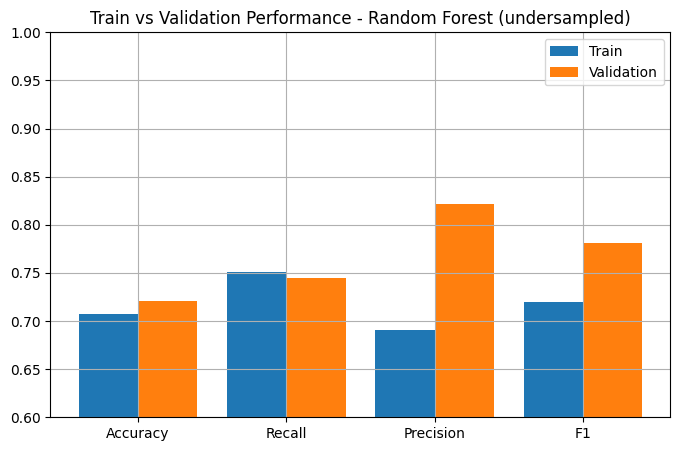

In [69]:
# Bar Chart of Train vs Validation Scores for Tuned Random Forest using undersampled data
labels = ['Accuracy', 'Recall', 'Precision', 'F1']
train_scores = [0.7070, 0.7510, 0.6903, 0.7194]
val_scores = [0.7213, 0.7447, 0.8214, 0.7812]

x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar([i + 0.4 for i in x], val_scores, width=0.4, label='Validation', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0.6, 1.0)
plt.title("Train vs Validation Performance - Random Forest (undersampled)")
plt.legend()
plt.grid(True)
plt.show()


- **Observations**
- Recall has dropped for the undersampled data.
- Precision is much higher on validation than train.

### Tuning with Gradient boosting with oversampled data

In [70]:
# Step 1: Define model
Model = GradientBoostingClassifier(random_state=1)

# Step 2: Define parameter grid
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Step 3: Define scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Step 4: Set up RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

# Step 5: Fit on oversampled data
randomized_cv.fit(X_train_over,y_train_over)

# Step 6: Output best parameters and recall
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8210577864838393:


In [71]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=150, random_state=1, subsample=0.9)

In [72]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_over, y_train_over
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.809305,0.83428,0.79459,0.813951


In [73]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.736264,0.809048,0.798724,0.803853


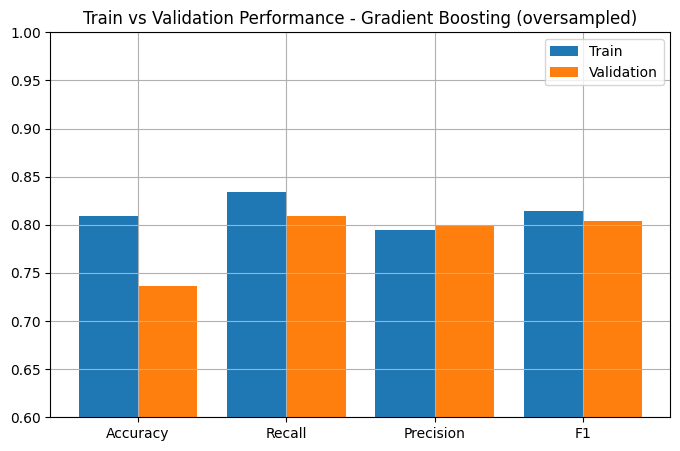

In [74]:
# Bar Chart of Train vs Validation Scores for Tuned Gradient Boosting using oversampled data
labels = ['Accuracy', 'Recall', 'Precision', 'F1']
train_scores = [0.8093, 0.8342, 0.7945, 0.8139]
val_scores = [0.7362, 0.8090, 0.79872, 0.8038]

x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar([i + 0.4 for i in x], val_scores, width=0.4, label='Validation', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0.6, 1.0)
plt.title("Train vs Validation Performance - Gradient Boosting (oversampled)")
plt.legend()
plt.grid(True)
plt.show()


- **Observations**
- Recall is above 80% on the training and validation set and still shows consistency on the main metric.
- Precision is showing higher than the tuned Random Forest.
- F1 is showing a good balance of precision and recall.
- The small gap between Recall and F1 for Train/VAL shows this model generalizes well.

### Tuning XGBoost using oversampled data

In [75]:
%%time

# Step 1: Define model for XGBoost (CPU version)
Model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss', # Keeps logloss as my evaluation metric
    use_label_encoder=False,
    random_state=1,
    tree_method='gpu_hist'  # Enables GPU training
)

# Step 2: Define parameter grid for XGBoost
param_grid = {
    "n_estimators": np.arange(125, 175, 25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample": [0.8, 0.9, 1],
    "colsample_bytree": [0.5, 0.7, 1],  # equivalent to max_features
    "max_depth": [3, 4, 5]
}

# Using a small grid because the process keeps getting terminated by Google Colab.
# param_grid_small = {
#    "n_estimators": [100],
#    "learning_rate": [0.1],
#    "max_depth": [3]
# }

# Step 3: Define scoring metric (focus on recall)
scorer = metrics.make_scorer(metrics.recall_score)

# Step 4: Set up RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=Model,
    param_distributions=param_grid,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    n_jobs=-1
)

# Step 5: Fit on oversampled data
randomized_cv.fit(X_train_over, y_train_over)

# Step 6: Output best parameters and recall
print("Best parameters are {} with CV score={:.4f}".format(
    randomized_cv.best_params_, randomized_cv.best_score_))


Best parameters are {'subsample': 0.9, 'n_estimators': 125, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1} with CV score=0.8282
CPU times: user 1.61 s, sys: 264 ms, total: 1.87 s
Wall time: 1min 30s


In [76]:
# Defining the model based on the best parameters from above.
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric='logloss',      # standard for binary classification
    subsample=0.9,
    colsample_bytree=1,
    n_estimators=125,
    learning_rate=0.05,
    max_depth=5,
    gamma=0,                    # not tuned, so default = 0
    scale_pos_weight=1,         # default (1) since I'm using oversampled data
    use_label_encoder=False     # avoid warning in newer versions
)

xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [77]:
# Checking model's performance on training set
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.81048,0.843193,0.791414,0.816483


In [78]:
# Checking model's performance on validation set
xgb2_val_perf = model_performance_classification_sklearn(xgb2,X_val,y_val)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.739796,0.82168,0.795506,0.808382


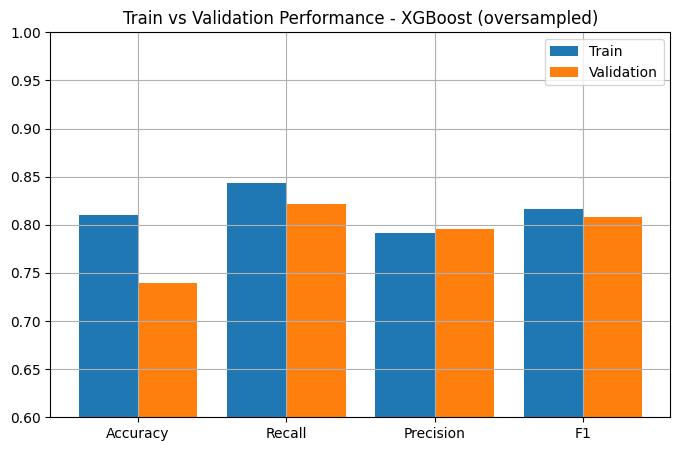

In [79]:
# Bar Chart of Train vs Validation Scores for Tuned XGBoost using oversampled data
labels = ['Accuracy', 'Recall', 'Precision', 'F1']
train_scores = [0.8104, 0.8431, 0.7914, 0.8164]
val_scores = [0.7397, 0.8216, 0.7955, 0.8083]

x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar(x, train_scores, width=0.4, label='Train', align='center')
plt.bar([i + 0.4 for i in x], val_scores, width=0.4, label='Validation', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylim(0.6, 1.0)
plt.title("Train vs Validation Performance - XGBoost (oversampled)")
plt.legend()
plt.grid(True)
plt.show()


- **Observations**
- Recall is above 80% on the training and validation set and still shows consistency on the main metric.
- Precision is showing higher than the tuned Random Forest.
- F1 is showing a good balance of precision and recall.
- The small gap between Recall and F1 for Train/VAL shows this model generalizes well.

**------------------------------------------**

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

**------------------------------------------**

## Model performance comparison and choosing the final model

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        adb_train.T,
        rf2_train_perf.T,
        gbm1_train.T,
        xgb2_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Oversampled data",
    "Random Forest trained with Undersampled data",
    "XGBoost trained with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost trained with Oversampled data,Gradient boosting trained with Oversampled data,Random Forest trained with Undersampled data,XGBoost trained with Oversampled data
Accuracy,0.786092,0.707070,0.809305,0.810480
Recall,0.804212,0.751083,0.834280,0.843193
Precision,0.776087,0.690317,0.794590,0.791414
F1,0.789899,0.719419,0.813951,0.816483


In [85]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        adb_val.T,
        rf2_val_perf.T,
        gbm1_val.T,
        xgb2_train_perf.T
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "AdaBoost trained with Oversampled data",
    "Gradient boosting trained with Oversampled data",
    "Random Forest trained with Undersampled data",
    "XGBoost trained with Oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost trained with Oversampled data,Gradient boosting trained with Oversampled data,Random Forest trained with Undersampled data,XGBoost trained with Oversampled data
Accuracy,0.720761,0.721350,0.736264,0.810480
Recall,0.792597,0.744712,0.809048,0.843193
Precision,0.790044,0.821452,0.798724,0.791414
F1,0.791318,0.781202,0.803853,0.816483


- **Observations**
- **XGBoost** (Oversampled)
- Highest recall (0.8432): This is crucial based on my business case — reducing false negatives (missing real certified cases) is the top priority.
- Strong precision (0.7914): We're not sacrificing precision to gain recall.
- Top F1 score (0.8165): Good balance.
- **Random Forest** (Undersampled) - Random Forest is close, but not quite as strong
- High recall, but slightly lower F1 and accuracy.
- **AdaBoost** (Oversampled)
- Less recall than XGBoost, but still a solid F1
- **Final Pick:** XGBoost

In [86]:
# Checking model's performance on "TEST" set
test = model_performance_classification_sklearn(xgb2, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.728807,0.826087,0.780677,0.802741


- **Observations**
- **XGBoost** (Oversampled)
- High recall. We're correctly identifying **~83%** of positive (Certified) cases.
- Precision	(0.78)	is good — ~78% of predicted positives are correct.
- F1 Score	(0.80)	Good balance between precision and recall


In [94]:
# Printing raw confusion matrix
y_pred = xgb2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 902  790]
 [ 592 2812]]


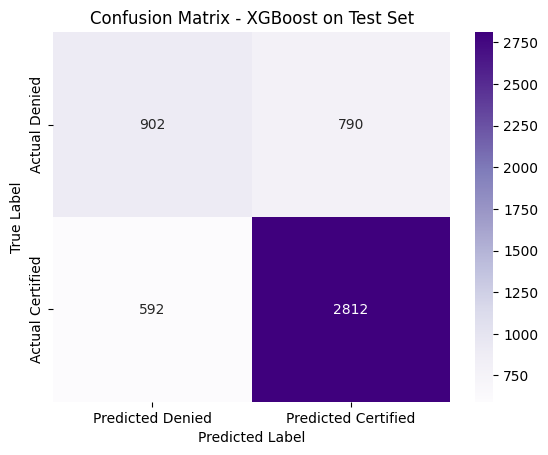

In [95]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Predicted Denied", "Predicted Certified"],
            yticklabels=["Actual Denied", "Actual Certified"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost on Test Set")
plt.show()


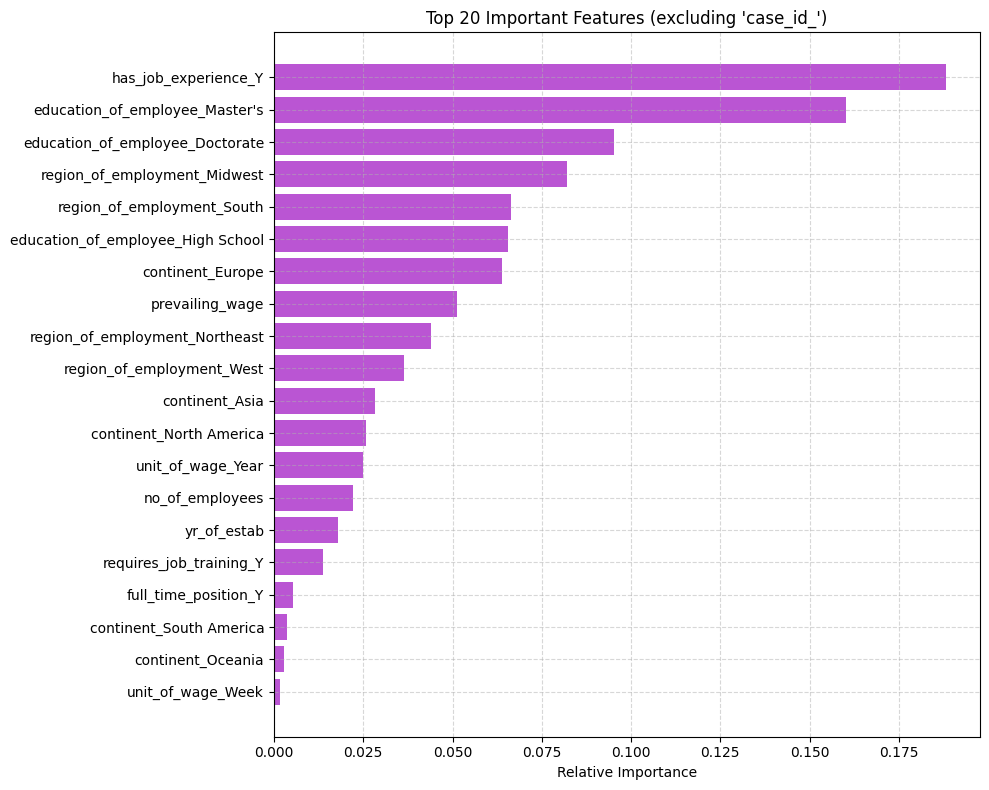

In [96]:
# Get feature importances from my model (e.g., tuned_gbm1)
importances = tuned_gbm1.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for easier filtering
feat_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Filter out all columns that start with 'case_id_'
feat_df = feat_df[~feat_df['feature'].str.startswith('case_id_')]

# Get top 20 important features (excluding the unwanted ones)
top_feats = feat_df.sort_values(by='importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(top_feats['feature'][::-1], top_feats['importance'][::-1], color='mediumorchid')
plt.xlabel("Relative Importance")
plt.title("Top 20 Important Features (excluding 'case_id_')")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


- **Observations**
- **Has Job Experience** is the most important data point followed by a **Matsers education level**.

## Actionable Insights and Recommendations

- **Observations**
- Using tuned **XGBoost** (Oversampled)
1. **We've built a model that can reliably predict visa outcomes**
- Final test recall = 82.6%
- Meaning: our model correctly identifies over 8 out of 10 visa applications that should be certified
- This enables early triage, automating pre-checks, and reducing manual review burden by filtering high-confidence denials or certifications
- Maintains a good precision — meaning not many false alarms
- Generalizes well
2. **Precision is strong** — few false positives
- So ~3 out of 4 applications the model says are “Certified” are actually correct
- This keeps downstream processes efficient (e.g., legal prep, approvals), avoiding wasted resources on misclassified cases
- Oversampled data consistently outperformed original and undersampled approaches
3. **Potential Business Applications:**
- **Visa Pre-Screening Tool**: Automate application triage with confidence scores
- **Applicant Support**: Alert applicants to issues before official submission
- **Risk Analysis**: Identify patterns in denials to guide better employer practices
- **Reporting**: Aggregate outcomes by region, job type, or employer for operational Key Performance Indicators (KPIs)


In [97]:
# Converting notebook to .html format for upload:

!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Mod3-Wk3_Thomas_Hall_EasyVisa Full Code Notebook.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Mod3-Wk3_Thomas_Hall_EasyVisa Full Code Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 28 image(s).
[NbConvertApp] Writing 1827913 bytes to /content/drive/MyDrive/Colab Notebooks/Mod3-Wk3_Thomas_Hall_EasyVisa Full Code Notebook.html
